In [1]:
# Add root folder to ptyhon path

import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

# Standard packages
import numpy as np
import scipy.stats as ss
from matplotlib import pyplot as plt

# Class packages
from pof.degradation import Degradation

In [2]:
d = Degradation()
#d.__dict__

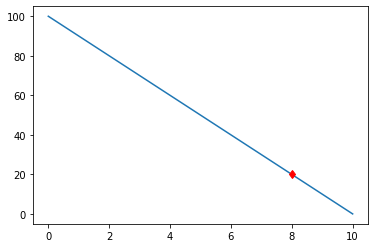

In [6]:
d.sim
d.plot_condition_profile()

In [4]:
d.measure()

nan

In [6]:
d.reset_degradation(t_new=5)

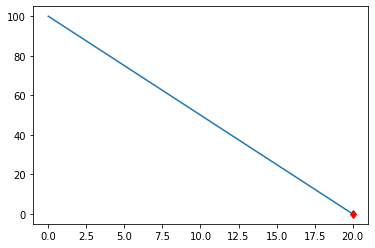

In [23]:
cause = dict(
    component = 'pole',
    issue = 'broken',
    reason = 'termites'
)

failure = dict(
    alpha = 50,
    beta = 1.5,
    gamma = 10
)


In [14]:
a = np.argmax(d.condition_profile<=0)
d.condition_profile[a]

0.0

In [5]:
# Probability of an asset failing

t = ss.weibull_min()

# Probability of 

TypeError: _parse_args() missing 1 required positional argument: 'c'

In [ ]:
wbl = weibull(50,1.5,10)

In [ ]:
from reliability.Distributions import Weibull_Distribution

In [8]:
wbf = Weibull_Distribution(alpha = wbl.alpha, beta = wbl.beta, gamma = wbl.gamma)

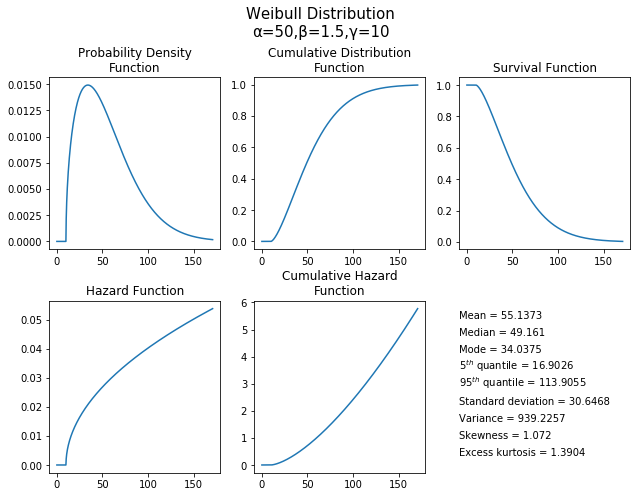

In [9]:
wbf.plot()

In [10]:
wbf.stats()

Descriptive statistics for Weibull distribution with alpha = 50.0 , beta = 1.5 , and gamma = 10.0
Mean =  55.13726464754668
Median = 49.160988438732566
Mode = 34.03749283845681
5th quantile = 16.90256332781421
95th quantile = 113.90553187672782
Standard deviation = 30.646789587733817
Variance = 939.2257120348299
Skewness = 1.0719865728909583
Excess kurtosis = 1.3904035615957744


In [11]:
%timeit ss.weibull_min.stats(wbl.beta, scale=wbl.alpha, loc=wbl.gamma, moments='mvsk')

480 µs ± 59.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
class failure:

    def __init__ (self, alpha, beta, gamma):
        
        # Default input parameters
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.max_age = 100
        self.interval = 1

        # Parameters that are used in further calculations
        self.b95 = ss.weibull_min.ppf(0.95, self.beta, scale=self.alpha, loc=self.gamma)

    def test(self, xvals=None, xmin=None, xmax=None):
        
        if xvals is not None:
            X = xvals
        elif xmin is not None and xmax is not None:
            X = np.linspace(xmin, xmax, 1000)
        else:
            X = np.linspace(0, self.b95 * 1.5, 1000)  # if no limits are specified, they are assumed

        # reliability charts
        self.pdf = ss.weibull_min.pdf(X, self.beta, scale=self.alpha, loc=self.gamma)
        self.cdf = ss.weibull_min.cdf(X, self.beta, scale=self.alpha, loc=self.gamma)
        self.csf = np.diff(self.cdf)

    def PointOfInitiation(self):
        """
        
        """

    def ExpectedOutcomes(self):
        # Time of earliest detection




SyntaxError: unexpected EOF while parsing (<ipython-input-12-1d6e100c7fb7>, line 37)

In [218]:
# Simple setup for Degradation class
t = np.arange(0,101,1)
x = np.arange(0,201,1)

alpha = 50
beta = 1.5
gamma = 10

pdf = ss.weibull_min.pdf(x, beta, scale=alpha, loc=gamma)
cdf = ss.weibull_min.cdf(x, beta, scale=alpha, loc=gamma)
sf = ss.weibull_min.sf(x, beta, scale=alpha, loc=gamma)

# Probability of initation
#TODO set to 0 for wear in failures
pf_interval = 5

x_poi = x + pf_interval
pdf_i = ss.weibull_min.pdf(x_poi, beta, scale= alpha, loc=gamma)
cdf_i = ss.weibull_min.cdf(x_poi, beta, scale= alpha, loc=gamma)
sf_i = ss.weibull_min.sf(x_poi, beta, scale=alpha, loc=gamma)
interval = 1

f_ti = ss.weibull_min.cdf(x_poi + 1, beta, scale= alpha, loc=gamma) - ss.weibull_min.cdf(x_poi, beta, scale= alpha, loc=gamma)
f_ti = np.append(0, f_ti[:-1])

# Linear degradation

deg_curve = np.linspace(100,0,11, dtype=int)
deg_curve

array([100,  90,  80,  70,  60,  50,  40,  30,  20,  10,   0])

In [219]:
# Test for condition_loss
t_min = 10
t_max = 20

t_forecast = np.linspace(t_min, t_max, t_max-t_min+1, dtype = int)


In [299]:
from scipy.linalg import circulant

# TODO always give it max pf window and then scale
# TODO make it work for everything

# Calculate the probability of initiation for the time period 
prob_initiation = f_ti[t_forecast[1:]]

# Add the probability after t_max onto the final row with perfect condition
prob_not_considered = sf_i[t_max]
prob_initiation = np.append(
    prob_initiation,
    prob_not_considered
)

# Scale to ignore the probability that occurs before t_min
prob_initiation = prob_initiation / prob_initiation.sum()

# Create a degradation matrix of future condition
deg_matrix = np.tril(np.full((deg_curve.size, deg_curve.size),100),-1) + np.triu(circulant(deg_curve).T)

In [221]:
# Scenario 1 - Perfect condition
# Scenario 2 - Imperfect condtion at t_start
# Scenario 3 - Imperfect condtion prior to t_start
# Get condition where condition = 

In [222]:
t_now = 0
t_end = max_age

def get_degradation_curve(t_start = t_now, t_end = max_age, cond_start = cond_max):

    # Replace with condition equation



SyntaxError: unexpected EOF while parsing (<ipython-input-222-a03d94b1ea80>, line 7)

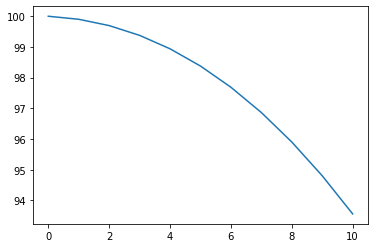

In [326]:
# TODO replace deg curve with deg_durve of current condtion
condition_outcomes = (deg_matrix.T * prob_initiation).T
condition_mean = condition_outcomes.sum(axis=0)


16.2 µs ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [278]:
plt.plot((deg_matrix[:,1:].T * prob_initiation))

ValueError: operands could not be broadcast together with shapes (10,11) (10,) 

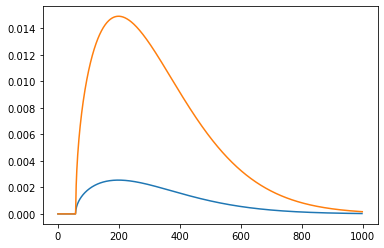

In [110]:
plt.plot(abc.csf)
plt.plot(abc.pdf)

In [8]:
dt = np.arange(10, 1, -1)

In [9]:
P = 0.8 * (1 - dt / 10)

In [10]:
P

array([0.  , 0.08, 0.16, 0.24, 0.32, 0.4 , 0.48, 0.56, 0.64])

In [20]:

gamma = 
ss.weibull_min.ppf([0.01, 0.5, 0.9], 1.5, scale=50, loc=10)

array([12.32857584, 49.16098844, 97.18607568])

In [51]:
%%timeit
nor = ss.norm.rvs(5,1,size = 1000)
wei_all = []
for i in range(0,1000,1):
    wei = ss.weibull_min.ppf(0.66, 1.5, scale=50, loc=nor)
    wei_all = np.append(wei_all, wei)

7.1 s ± 1.35 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


(array([   5000.,   55000.,  405000., 1392000., 2673000., 2888000.,
        1782000.,  666000.,  121000.,   13000.]),
 array([53.60521661, 54.37774647, 55.15027632, 55.92280618, 56.69533603,
        57.46786589, 58.24039575, 59.0129256 , 59.78545546, 60.55798531,
        61.33051517]),
 <a list of 10 Patch objects>)

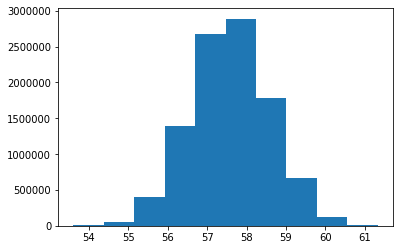

In [52]:
from pof.degradation import Degradation

NameError: name 'X' is not defined